#### What is Regression?

Regression analysis is a form of preditive modelling technique which investigates the relationship between a dependant and independant variable.  

Uses:
->Determining the strength of predictors
->Forecasting an effect
->Trend Forecasting

    Concept                     : The data is modelled using a straight line
    Used with                   : Continuous variable
    Output/Prediction           : Value of the Variable
    Accuracy/Goodness of fit    : measured by loss, R Squared, Adjusted R Squared. 

#### What is Linear Regression? 
A statistical model that attempts to show the linear relationship between the variables with linear equation.


#### Why Linear Regression? 

As the Linear Regression is used to predict the Value of the Continuous Variable(Charges), we use it here. 
Such as - sales made on a day, Temperature of a city.
And the linear Regression is not good for discrete variable(Output)

#### DATA SET INFORMATION:::
This is "Sample Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

age : age of policyholder

sex: gender of policy holder (female=0, male=1)

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 steps: average walking steps per day of policyholder 

children: number of children / dependents of policyholder 

smoker: smoking state of policyholder (non-smoke=0;smoker=1) 

region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)

charges: individual medical costs billed by health insurance 

insuranceclaim: yes=1, no=0

R Square Value: 
    This Value tells how close the data are to the fitted regression line. 
    Coefficient of determination or Coefficient of multiple determination

The Value should be close to 1(Regression line).
If the value is 1 - it means all the data points lies on the regression line. 

Note: It is also possible to have a low R Squared value for a good Model & high R Squared value for a line that does not fit at all. 

### Lets Start Now... 
Import all the libraries required.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import pearsonr,spearmanr

Import the DataSet from the path. 

In [4]:
df=pd.read_csv('C:\\Users\\vragha2x\\Desktop\\Other Docs\\PDS\\Python\\insurance.csv')

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Exploratory Data Analysis(EDA)

#### UniVariate Analysis

1.AGE

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

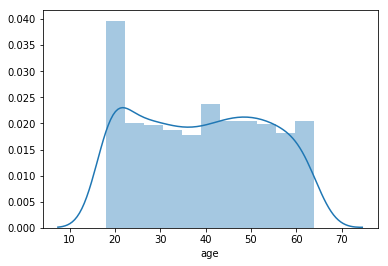

In [12]:
sns.distplot(df.age)
df.age.describe()

'Age' is a uniform distribution

2.SEX

In [20]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [22]:
df.sex.value_counts()/len(df.sex)

male      0.505232
female    0.494768
Name: sex, dtype: float64

3.BMI

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

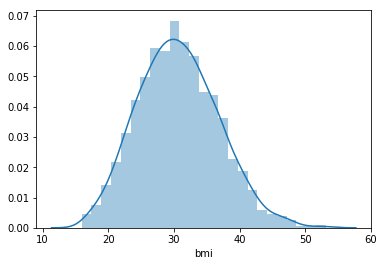

In [24]:
sns.distplot(df.bmi)
df.bmi.describe()

'BMI' is a unifirm distribution

4.CHILDREN

In [8]:
df.children.value_counts()/len(df)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64

5.SMOKER

In [10]:
df.smoker.value_counts()/len(df)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

6.REGION

In [14]:
df.region.value_counts()/len(df)

southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64

7.CHARGES

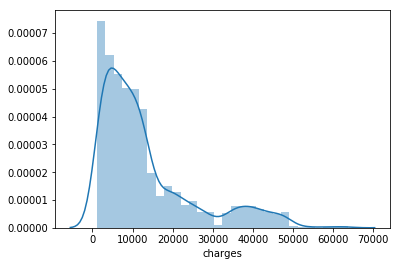

In [15]:
sns.distplot(df.charges)

As we can see here, charges are divided into 1 part till 30000, and into another part after 30000

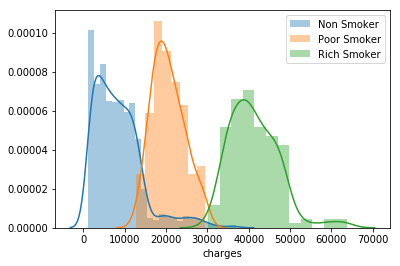

In [13]:
sns.distplot(df[df.smoker=='no'].charges,label='Non Smoker')
sns.distplot(df[(df.smoker=='yes')&(df.charges<30000)].charges,label='Poor Smoker')
sns.distplot(df[(df.smoker=='yes')&(df.charges>30000)].charges,label='Rich Smoker')

plt.legend()

In the above plot, 
'Non Smoker' describes about the charges for who doesn't Smoke at all.

'Poor Smoker' descirbes about who smokes and thier charges are average. 

'Rich Smoker' descirbes about who smokes and their charges are High. 

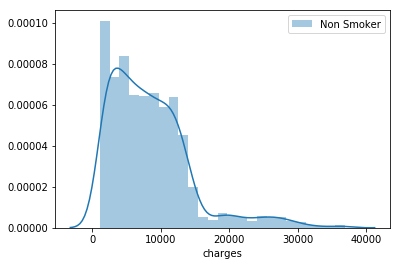

In [14]:
sns.distplot(df[df.smoker=='no'].charges,label='Non Smoker')
plt.legend()

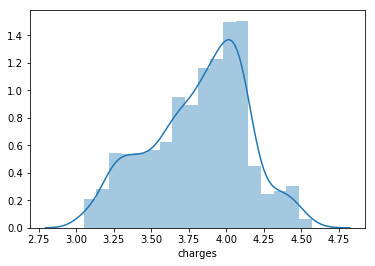

In [15]:
sns.distplot(np.log10(df[df.smoker=='no'].charges))

Taking log will maximize the bins clearly. 

#### MultiVariate Analysis

In [16]:
#H0: Less Smoking, more Children

df.groupby('smoker')['children'].value_counts()/df.groupby('smoker')['children'].count()


smoker  children
no      0           0.431391
        1           0.247180
        2           0.173872
        3           0.110902
        4           0.020677
        5           0.015977
yes     0           0.419708
        1           0.222628
        2           0.200730
        3           0.142336
        4           0.010949
        5           0.003650
Name: children, dtype: float64

No Smoking ppl has No children(0.431391)
& Smoking ppl also has No children(0.419708)

In [17]:
#H0: Older people(Age above 60), Smoking habbit, Children

df[df.age>=60].groupby('smoker')['children'].value_counts()#/df[df.age>=60].groupby('smoker')['children'].count()

smoker  children
no      0           63
        1            9
        3            8
        2            6
        4            1
yes     0           17
        1            4
        2            3
        3            3
Name: children, dtype: int64

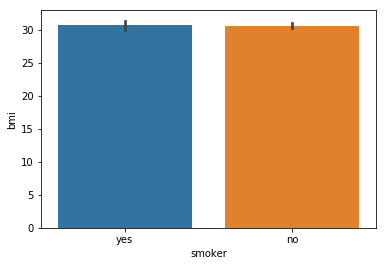

In [39]:
#H0: We loose BMI by Smoking

sns.barplot(df.smoker,df.bmi)

This looks strange as both smoker and Non Smoker has the same BMI

In [42]:
#Who smokes more, male or Female


df.groupby('smoker')['sex'].value_counts()/df.groupby('smoker')['sex'].count()

smoker  sex   
no      female    0.514098
        male      0.485902
yes     male      0.580292
        female    0.419708
Name: sex, dtype: float64

Male smokes more than Female. 

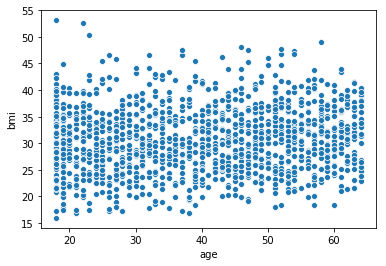

In [18]:
# How Age impacts the BMI
#H0: As the Age increases, BMI Increases,You gain weight.
# Age correlated to weight.

sns.scatterplot(df.age,df.bmi)

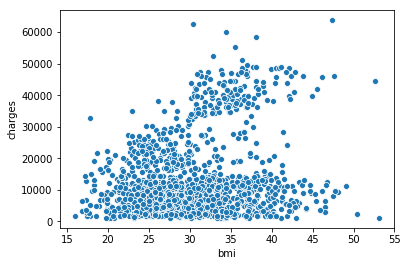

In [45]:
sns.scatterplot(df.bmi,df.charges)

In [47]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Compartively in NorthEast region , the charges are high

In [49]:
df.groupby('region')['smoker'].value_counts()/df.groupby('region')['smoker'].count()

region     smoker
northeast  no        0.793210
           yes       0.206790
northwest  no        0.821538
           yes       0.178462
southeast  no        0.750000
           yes       0.250000
southwest  no        0.821538
           yes       0.178462
Name: smoker, dtype: float64

OMG. In all the regions, the non smoker has been charged high than the smokers. so this shows that the Region is useless for predicting the charges

In [50]:
df.groupby('region')['sex'].value_counts()/df.groupby('region')['sex'].count()

region     sex   
northeast  male      0.503086
           female    0.496914
northwest  female    0.504615
           male      0.495385
southeast  male      0.519231
           female    0.480769
southwest  male      0.501538
           female    0.498462
Name: sex, dtype: float64

In all the 4 regions, male and females are almost of equal numbers

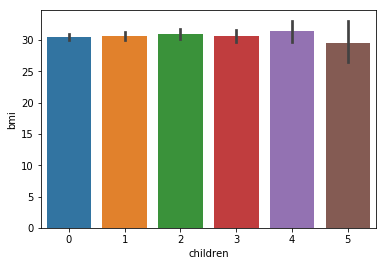

In [51]:
# No relation between Bmi and children

sns.barplot(df.children,df.bmi)

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

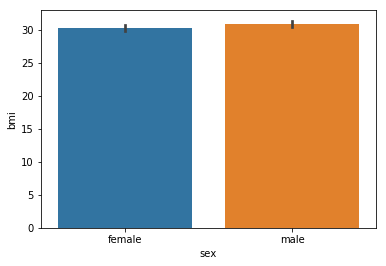

In [56]:
# Female will have less BMI, and with LESS BMI they pay less

sns.barplot(df.sex,df.bmi)
df.groupby('sex')['bmi'].mean()

Male and Female has the same BMI more or less

In [64]:
# lets check the charges of Female who has BMI less than 30 and more than 30

print('Avg charge of a female who has BMI less than 30 is :'+str(df[(df.bmi<=30)&(df.sex=='female')]['charges'].mean()))
print('Avg charge of a female who has BMI less than 30 is :'+str(df[(df.bmi>30)&(df.sex=='female')]['charges'].mean()))


Avg charge of a female who has BMI less than 30 is :10735.544429204265
Avg charge of a female who has BMI less than 30 is :14370.66653245508


In [67]:
df.groupby('region')['bmi'].mean()

region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

In [68]:
df.groupby(['smoker','children'])['charges'].mean()

smoker  children
no      0            7611.793335
        1            8303.109350
        2            9493.093674
        3            9614.519391
        4           12121.344408
        5            8183.845556
yes     0           31341.363954
        1           31822.654334
        2           33844.235755
        3           32724.915268
        4           26532.276933
        5           19023.260000
Name: charges, dtype: float64

In [69]:
df[(df.children>=4)&(df.smoker=='yes')]

,age,sex,bmi,children,smoker,region,charges
494,21,male,25.70,4,yes,southwest,17942.1060
621,37,male,34.10,4,yes,southwest,40182.2460
1085,39,female,18.30,5,yes,southwest,19023.2600
1307,32,male,28.12,4,yes,northwest,21472.4788


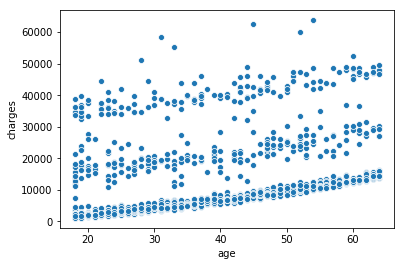

In [70]:
sns.scatterplot(df.age,df.charges)

## Data preparation

In [19]:
X=df[['age','sex','bmi','smoker','children','region']].copy()
X.sex=X.sex.map(lambda x:1 if x=='male' else 0)
X.smoker=X.smoker.map(lambda x:1 if x=='yes' else 0)
X=X.drop(['region'],axis=1)
lr=LinearRegression()
lr.fit(X,y)
y_hat=lr.predict(X)
residuals=y-y_hat

In [20]:
y=df.charges

In [21]:
print('MSE:', mean_squared_error(y,y_hat))
print('RMSE:',mean_squared_error(y,y_hat)**0.5)
print('MAE:',mean_absolute_error(y,y_hat))
print('R2 Score:',r2_score(y,y_hat))

MSE: 36676355.79457731
RMSE: 6056.100708754546
MAE: 4178.65598727367
R2 Score: 0.7497225098709179


In [22]:
def adj_r2(y,y_hat,p):
    r2=r2_score(y,y_hat)
    n=len(y)
    return 1 - (1-r2)*(n-1)/(n-p-1)

In [23]:
adj_r2(y,y_hat,X.shape[1])

0.7487830298028658

In [24]:
adj_r2(y,y_hat,X.shape[1]+4)

0.7480263521817901

#The Adjusted R2 value looks not bad.. we can see how can this be tuned further for better score. 

## Things We Missed. 

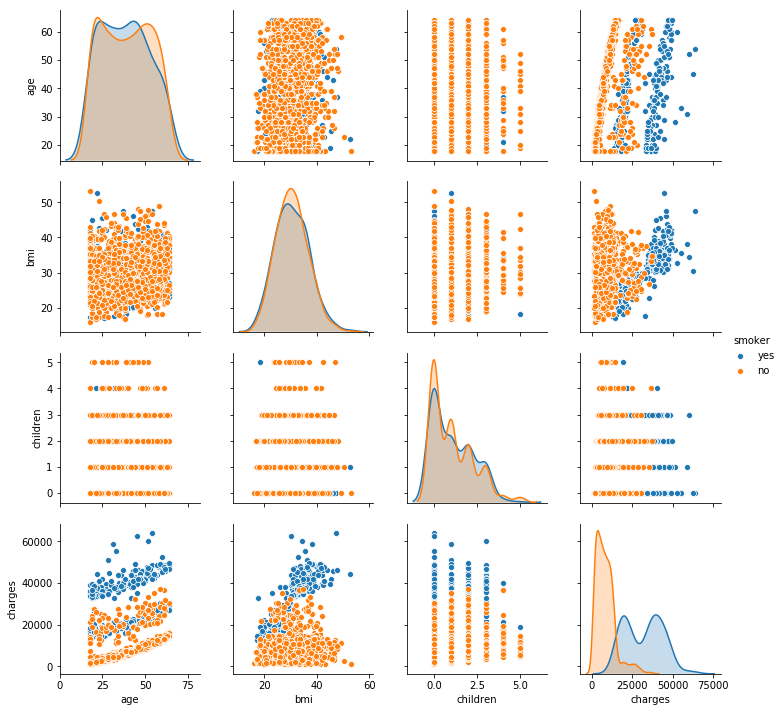

In [27]:
sns.pairplot(df,hue='smoker')

pearsonr: 0.8064806070155406


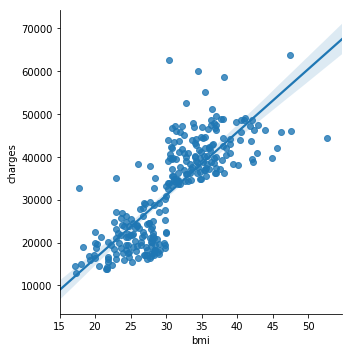

In [28]:
from scipy.stats import pearsonr
sns.lmplot(data=df[df.smoker=='yes'],x='bmi',y='charges')
print('pearsonr:',pearsonr(df[df.smoker=='yes'].bmi,df[df.smoker=='yes'].charges)[0])

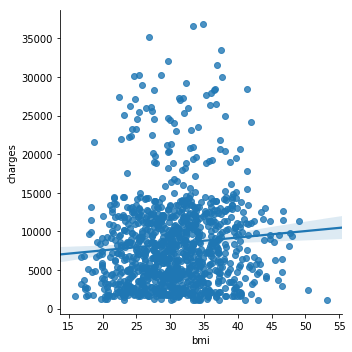

In [29]:
sns.lmplot(data=df[df.smoker=="no"],x="bmi",y="charges")

Will add a new column called 'Obese' and will see how the data looks like. 

In [30]:
df["obese"]=df.bmi.map(lambda x:"obese" if x>30 else "fit")

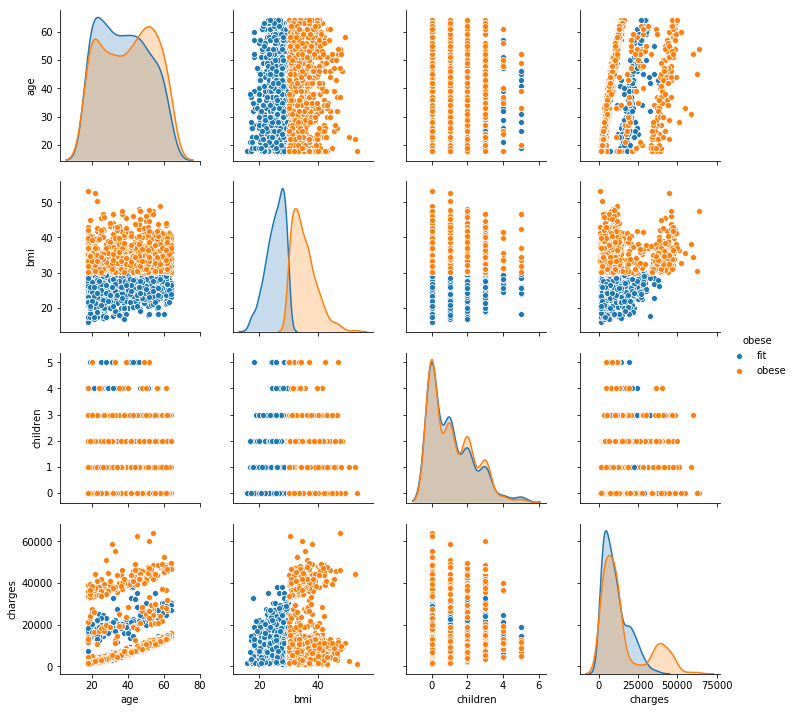

In [31]:
sns.pairplot(df,hue="obese")

Will add another new column called 'fit_fat' and will label as fit smoker, fat smoker, fit and fat

In [32]:
def obese_smoker(obese,smoker):
    if obese=="obese" and smoker=="yes":
        return "fat_smoker"
    elif obese=="fit" and smoker=="yes":
        return "fit_smoker"
    elif obese=="obese" and smoker=='no':
        return "fat"
    else:
        return "fit"  

In [ ]:
df["fit_fat"]=df[["obese","smoker"]].apply(lambda x: obese_smoker(x["obese"],x["smoker"]),axis=1)

In [36]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,obese,fit_fat
0,19,female,27.900,0,yes,southwest,16884.92400,fit,fit_smoker
1,18,male,33.770,1,no,southeast,1725.55230,obese,fat
2,28,male,33.000,3,no,southeast,4449.46200,obese,fat
3,33,male,22.705,0,no,northwest,21984.47061,fit,fit
4,32,male,28.880,0,no,northwest,3866.85520,fit,fit


In [37]:
#
X=df[['age', 'bmi', 'children', "fit_fat"]].copy()
#X.sex=X.sex.map(lambda x: 1 if x=="male" else 0)
#X.smoker=X.smoker.map(lambda x: 1 if x=="yes" else 0)
X=X.join(pd.get_dummies(X.fit_fat)).drop(["fit_fat"],axis=1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
y_hat=lr.predict(X)
residuals=y-y_hat

print("MSE:",mean_squared_error(y,y_hat))

print("RMSE:",mean_squared_error(y,y_hat)**0.5)

print("MAE:",mean_absolute_error(y,y_hat))

print("R squared:",r2_score(y,y_hat))

MSE 19950178.065635122
RMSE 4466.562220056396
MAE 2457.464578583225
R squared 0.863861052012325


In [39]:
adj_r2(y,y_hat,X.shape[1])

0.8631445312334425

In [40]:
for i,j in zip(X.columns,lr.coef_):
    print(i,"*",j,"+")
print(lr.intercept_)

age * 264.61794718011305 +
bmi * 90.66047183591587 +
children * 501.643592644292 +
fat * -12028.766956891413 +
fat_smoker * 21201.182647306592 +
fit * -11293.491065890801 +
fit_smoker * 2121.075375475601 +
6367.559465277819


So this model looks better than the before